In [1]:
import sys
sys.path.append('/home/maklins/Documentos/MasterDataScience/ML/ml_final_lab/')
import pandas as pd
import os
import numpy as np

from modules.models.algorithm_interpretation import lime_class
from modules.models.algorithms import get_algorithm 
from modules.utils.io import get_data
from modules.visualization.graphs import tree_graph_notebook





In [2]:
# Get data 
X_names, y_names,X_train, X_test, y_train, y_test = get_data("iris")
X_names

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
y_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
len(y_train)

120

In [5]:
# Select interpretable algorithm
interpretable_model = get_algorithm("decission_tree_classifier")
interpretable_model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=25,
            splitter='random')

In [6]:
# Train algorithm 
ml_tree = interpretable_model.fit(X_train,y_train)
ml_tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=25,
            splitter='random')

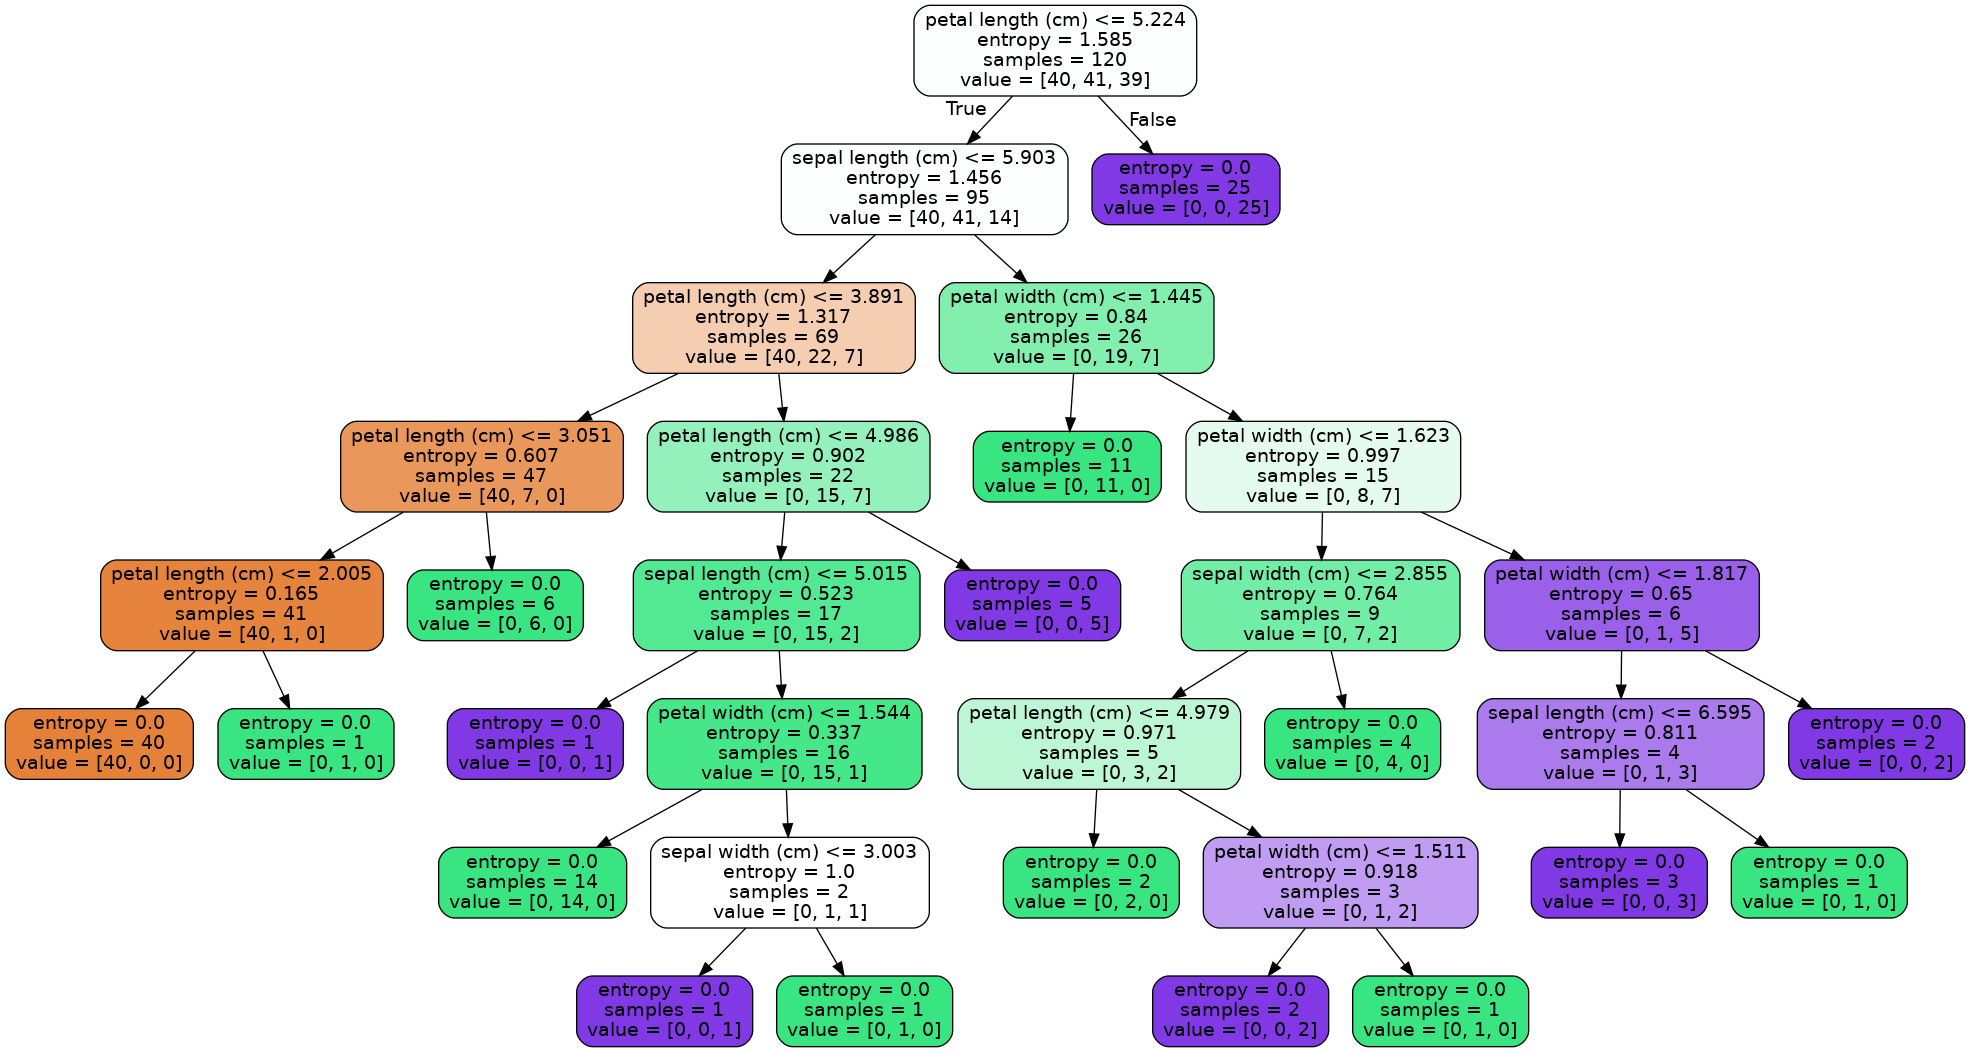

In [7]:
# Visualize results
from IPython.display import Image
graph=tree_graph_notebook(ml_tree,X_names)
Image(graph)


In [8]:
import sklearn
sklearn.metrics.accuracy_score(y_test, interpretable_model.predict(X_test))

1.0

In [9]:
# Select NON-interpretable algorithm
non_interpretable_model = get_algorithm("random_forest_classifier")
non_interpretable_model.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=23, verbose=0, warm_start=False)

In [10]:
import sklearn
sklearn.metrics.accuracy_score(y_test, non_interpretable_model.predict(X_test))

1.0

In [11]:
#train_total = X_train
#train_total = np.append(train_total,y_train
train_total = [ np.append(X_train[i],y_train[i]) for i in range(len(X_train))]
#train_total[]=y_train
#train_total = train_total.values

#test_total = X_test
#np.append(test_total,y_test)
test_total = [ np.append(X_test[i],y_test[i]) for i in range(len(X_test))]
train_total = np.array(train_total)
test_total = np.array(test_total)
train_total.shape

(120, 5)

In [18]:
import lime
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, class_names=[0,1,2], discretize_continuous=True)
i = np.random.randint(0, X_test.shape[0])
exp = explainer.explain_instance(X_test[i], non_interpretable_model.predict_proba, num_features=4, top_labels=2)

In [19]:
# Interpret the algorithm
# https://marcotcr.github.io/lime/tutorials/Tutorial%20-%20continuous%20and%20categorical%20features.html
#explainer =lime(X_train,X_test,X_names, y_names,num_features=2,non_interpretable_model)
limer = lime_class(X_train,X_names, y_names)
ret = limer.explain_instance(X_test,non_interpretable_model)
#ret.show_in_notebook(show_table=True,show_all=True)
# Visualize results
#sklearn.metrics.accuracy_score(y_test, model.predict(X_test))
dir(ret.show_in_notebook(show_table=True, show_all=True))

['__bool__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [20]:
import lime
import lime.lime_tabular
import numpy as np
import sklearn
import sklearn.ensemble

rf = sklearn.ensemble.RandomForestClassifier(n_estimators=500)
rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [13]:
explainer2 = lime.lime_tabular.LimeTabularExplainer(X_train, 
                                                   feature_names=X_names, 
                                                   class_names=y_names, 
                                                   discretize_continuous=True)
i = 20
exp2 = explainer2.explain_instance(X_test[i], 
                                 rf.predict_proba, 
                                 num_features=4, 
                                 top_labels=3)

#X_test[i]
rf.predict_proba(X_test[i:i+1])
#dir(X_names)
X_test[i:i+1]

array([[4.7, 3.2, 1.6, 0.2]])

In [14]:
#dir(exp2)
#exp2.as_pyplot_figure(X_names)
#from IPython.core.display import display, HTML
#display(HTML(exp2.as_html(labels=None,predict_proba=None,show_predicted_value=True)))
exp2.save_to_file("/home/maklins/Documentos/MasterDataScience/ML/ml_final_lab/bla.html")

TypeError: Object of type 'int64' is not JSON serializable

In [64]:
feature_index = lambda x: X_names.index(x)
print('Increasing petal width')
temp = X_test[i].copy()
print('P(setosa) before:', rf.predict_proba(temp.reshape(1,-1))[0,0])
temp[feature_index('petal width (cm)')] = 1.5
print('P(setosa) after:', rf.predict_proba(temp.reshape(1,-1))[0,0])
print ()
print('Increasing petal length')
temp = X_test[i].copy()
print('P(setosa) before:', rf.predict_proba(temp.reshape(1,-1))[0,0])
temp[feature_index('petal length (cm)')] = 3.5
print('P(setosa) after:', rf.predict_proba(temp.reshape(1,-1))[0,0])
print()
print('Increasing both')
temp = X_test[i].copy()
print('P(setosa) before:', rf.predict_proba(temp.reshape(1,-1))[0,0])
temp[feature_index('petal width (cm)')] = 1.5
temp[feature_index('petal length (cm)')] = 3.5
print('P(setosa) after:', rf.predict_proba(temp.reshape(1,-1))[0,0])

Increasing petal width
P(setosa) before: 1.0
P(setosa) after: 0.476

Increasing petal length
P(setosa) before: 1.0
P(setosa) after: 0.548

Increasing both
P(setosa) before: 1.0
P(setosa) after: 0.024
